### Potential Energy/ Potential Function and MH

Potential Energy - $U(\theta)$ \
Potential Function - $p(\theta)$ 

Define, 

$U(\theta) = -log(p(\theta))$

So,

p($\theta$) = $e^{-U(\theta)}$



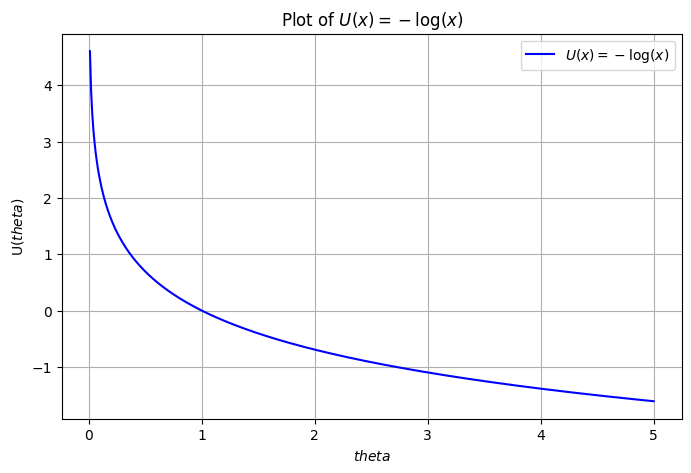

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values (must be > 0 since log(0) is undefined)
x = np.linspace(0.01, 5, 500)
y = -np.log(x)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$U(x) = -\log(x)$', color='blue')
plt.title('Plot of $U(x) = -\log(x)$')
plt.xlabel('$theta$')
plt.ylabel('U($theta$)')
plt.grid(True)
plt.legend()
plt.show()



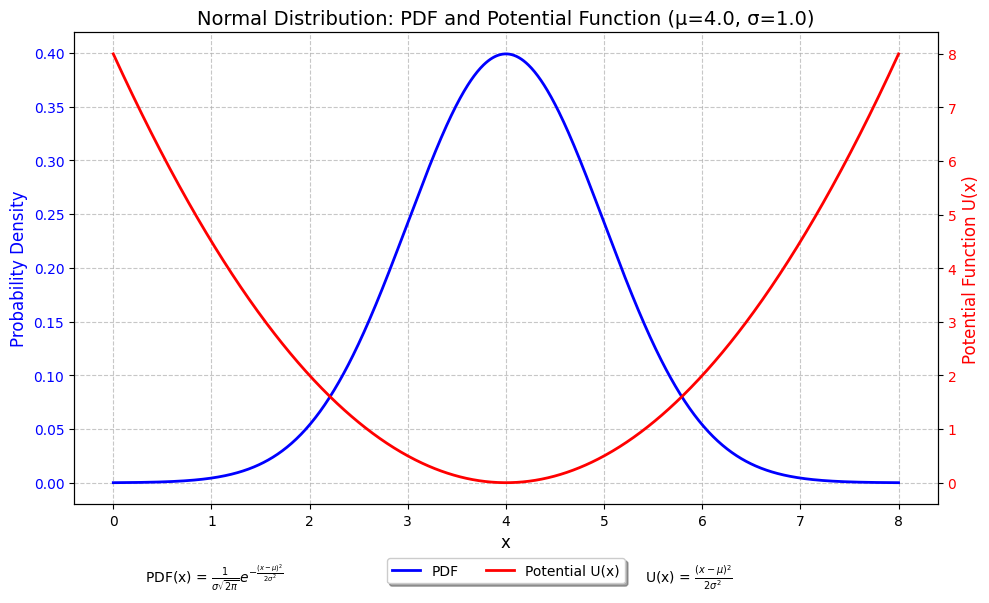

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def normal_pdf(x, mu, sigma):
    """Calculate the normal probability density function."""
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def potential_function(x, mu, sigma):
    """Calculate the potential function U(x) = (x-μ)²/(2σ²)."""
    return ((x - mu) ** 2) / (2 * sigma ** 2)

# Fixed parameters
mu = 4.0  # Mean
sigma = 1.0  # Standard deviation

# Generate x values
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

# Calculate PDF and potential function
pdf_values = normal_pdf(x, mu, sigma)
potential_values = potential_function(x, mu, sigma)

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PDF on the left y-axis
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('Probability Density', color='blue', fontsize=12)
ax1.plot(x, pdf_values, 'b-', linewidth=2, label='PDF')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the potential function
ax2 = ax1.twinx()
ax2.set_ylabel('Potential Function U(x)', color='red', fontsize=12)
ax2.plot(x, potential_values, 'r-', linewidth=2, label='Potential U(x)')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
plt.title(f'Normal Distribution: PDF and Potential Function (μ={mu}, σ={sigma})', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           ncol=2, fancybox=True, shadow=True)

# Add formula annotations
plt.figtext(0.15, 0.02, r'PDF(x) = $\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$', fontsize=10)
plt.figtext(0.65, 0.02, r'U(x) = $\frac{(x-\mu)^2}{2\sigma^2}$', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for formula annotations
plt.savefig('normal_distribution_potential.png', dpi=300, bbox_inches='tight')
plt.show()

Potential function is the negative of the probability density function. In above equation, we have defined the potential energy function as the negative of the probability density function. While doing that we have dropped the constant term. The constant term is not important in the context of MALA.

In optimization and machine learning contexts, we go against (opposite direction of) the gradient of the potential function because. Seeking minimum energy: The potential function U(x) represents an "energy landscape" where lower values are more favorable states (higher probability regions in a distribution). The gradient points in the direction of steepest increase, so moving against it leads us to lower energy states.




Assignment

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
def target_function(x): 
    return -x**2 * (x**2 - 1)

In [80]:
x = np.linspace(-1.1, 1.1, 1000)
y = target_function(x)

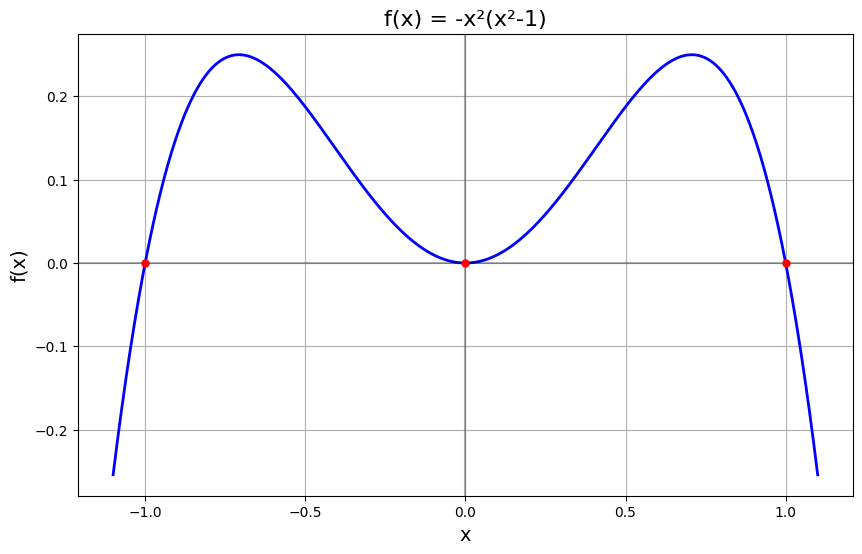

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2)
plt.grid(True)
plt.title('f(x) = -x²(x²-1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the roots and critical points
roots = [0, -1, 1]
for root in roots:
    plt.plot(root, 0, 'ro', ms=5)

plt.show()

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_24273/2881675553.py:5: RuntimeWarning: invalid value encountered in log
  return -np.log(target_function(x))


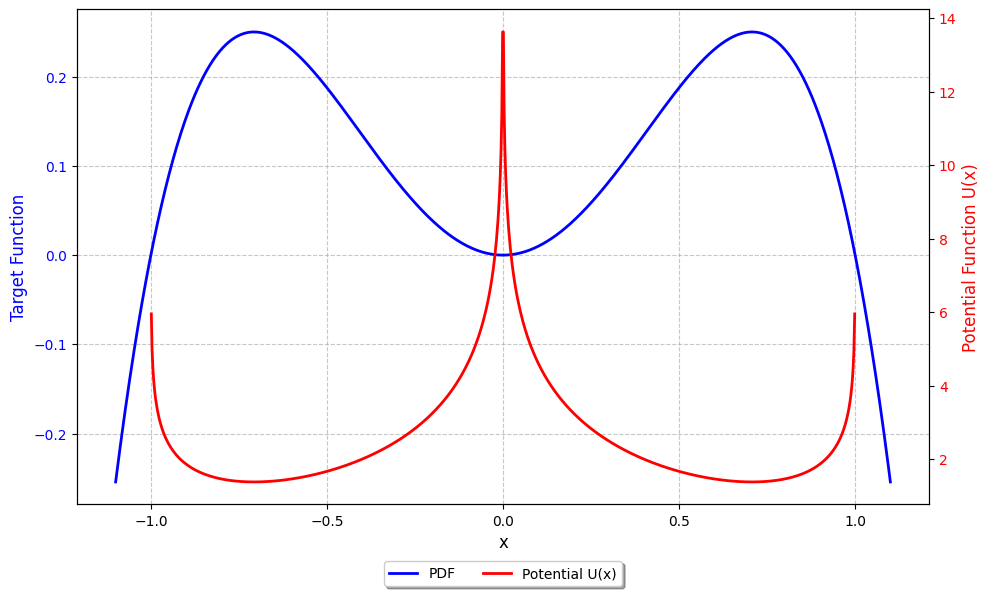

In [109]:
def target_function(x): # PDF in our case
    return -x**2 * (x**2 - 1)

def potential_function(x): # Potential function
    return -np.log(target_function(x))

# Calculate PDF and potential function
x = np.linspace(-1.1, 1.1, 1000)
y = target_function(x)
potential_values = potential_function(x)

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PDF on the left y-axis
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('Target Function', color='blue', fontsize=12)
ax1.plot(x, y, 'b-', linewidth=2, label='PDF')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the potential function
ax2 = ax1.twinx()
ax2.set_ylabel('Potential Function U(x)', color='red', fontsize=12)
ax2.plot(x, potential_values, 'r-', linewidth=2, label='Potential U(x)')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
# plt.title(f'Normal Distribution: PDF and Potential Function (μ={mu}, σ={sigma})', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           ncol=2, fancybox=True, shadow=True)

# Add formula annotations
# plt.figtext(0.15, 0.02, r'PDF(x) = $\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$', fontsize=10)
# plt.figtext(0.65, 0.02, r'U(x) = $\frac{(x-\mu)^2}{2\sigma^2}$', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for formula annotations
# plt.savefig('normal_distribution_potential.png', dpi=300, bbox_inches='tight')
plt.show()

Metropolis Hasting 

In [ ]:
# Metropolis-Hastings with non-symmetric proposal
def metropolis_hastings(iter, initial_x, proposal_type="symmetric", proposal_width=0.5):

    # our function is not a probability density function
    # but we can use it as a target function
    def target_function(x): # PDF in our case
        return  -(x**2 * (x**2 - 1))
    
    # Initialize
    burn_in = 1000
    iterations = iter + burn_in

    # Store samples
    samples = np.zeros(iterations)
    current_x = initial_x
    samples[0] = current_x

    # Acceptance counter
    accepted = 0

    for i in range(1, iterations):

        # Propose a new sample
        if proposal_type == "symmetric":
            # Symmetric proposal : Gaussian centered at current_x
            # with standard deviation proposal_width
            proposed_x = current_x + np.random.normal(0, proposal_width)

            # For symmetric proposals, q(x'|x) = q(x|x'), so the ratio is 1
            # in here q should be gaussian density
            proposal_ratio = 1.0

        elif proposal_type == "asymmetric":

            # Asymmetric proposal: Skewed distribution
            # Here we'll use an exponential proposal distribution
            # When moving right: sample from exponential distribution
            # When moving left: sample from negative exponential distribution
            direction = np.random.choice([-1, 1])
            if direction > 0:
                # Moving right: propose a positive step with exponential distribution
                step = np.random.exponential(proposal_width)
                proposed_x = current_x + step
                
                # Calculate q(x|x')/q(x'|x)
                # q(x'|x) is exponential density of step
                q_forward = (1/proposal_width) * np.exp(-step/proposal_width)
                
                # q(x|x') would be negative exponential (moving left from proposed_x to current_x)
                reverse_step = proposed_x - current_x  # Same as 'step'
                q_reverse = (1/proposal_width) * np.exp(-reverse_step/proposal_width)
                
            else:
                # Moving left: propose a negative step with exponential distribution
                step = np.random.exponential(proposal_width)
                proposed_x = current_x - step
                
                # Calculate q(x|x')/q(x'|x)
                # q(x'|x) is negative exponential density of step
                q_forward = (1/proposal_width) * np.exp(-step/proposal_width)
                
                # q(x|x') would be positive exponential (moving right from proposed_x to current_x)
                reverse_step = current_x - proposed_x  # Same as 'step'
                q_reverse = (1/proposal_width) * np.exp(-reverse_step/proposal_width)
            
            # Hastings correction: ratio of proposal densities
            proposal_ratio = q_reverse / q_forward


        else:
            raise ValueError("Invalid proposal type. Use 'symmetric' or 'asymmetric'.")
        

        # Calculate acceptance probability with Hastings correction
        current_density = target_function(current_x)
        proposed_density = target_function(proposed_x)

        # The full Metropolis-Hastings acceptance probability
        if current_density == 0:
            acceptance_prob = 1.0
        else:
            acceptance_prob = min(1.0, (proposed_density / current_density) * proposal_ratio)

        # Accept or reject the proposal
        if np.random.uniform(0, 1) < acceptance_prob:
            current_x = proposed_x
            accepted += 1
            
        samples[i] = current_x

    acceptance_rate = accepted / (iterations-burn_in)
    print(f"Acceptance rate: {acceptance_rate:.2f}")

    # Discard burn-in samples
    samples = samples[burn_in:]

    return samples

Symmetric proposal distribution

In [99]:
samples = metropolis_hastings(10000, initial_x=0.5, proposal_type="symmetric", proposal_width=0.5)

Acceptance rate: 0.53


In [100]:
def target_function(x): # PDF in our case
    return  -(x**2 * (x**2 - 1))

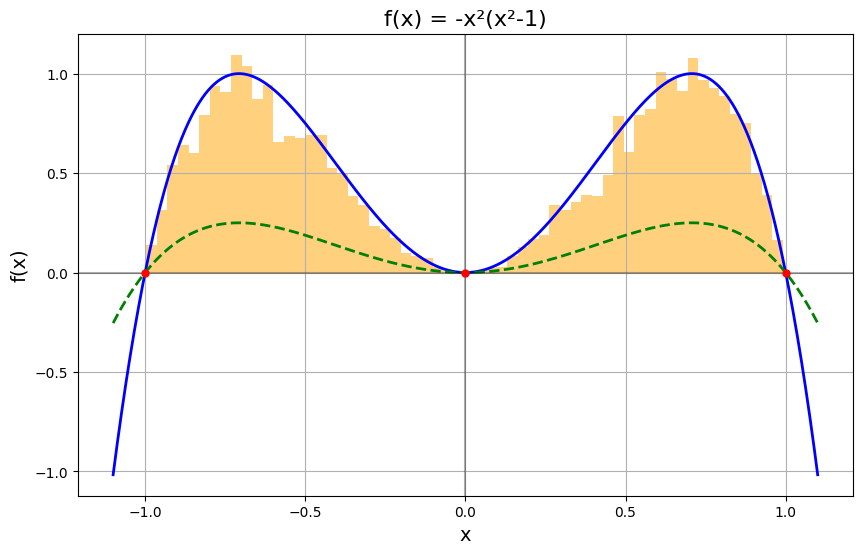

In [102]:
x = np.linspace(-1.1, 1.1, 1000)
y_unnormalized = target_function(x)

y = y_unnormalized / np.max(y_unnormalized)  # Normalize the target function for plotting


plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2, label='Normalized PDF')
plt.plot(x, y_unnormalized, 'g--', lw=2, label='Unnormalized PDF')
plt.hist(samples, bins=60, density=True, alpha=0.5, color='orange', label='Samples')
plt.grid(True)
plt.title('f(x) = -x²(x²-1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the roots and critical points
roots = [0, -1, 1]
for root in roots:
    plt.plot(root, 0, 'ro', ms=5)

plt.show()



Asymmetric proposal distribution

In [105]:
samples_asymmetric = metropolis_hastings(10000, initial_x=0.5, proposal_type="asymmetric", proposal_width=0.5)

Acceptance rate: 0.53


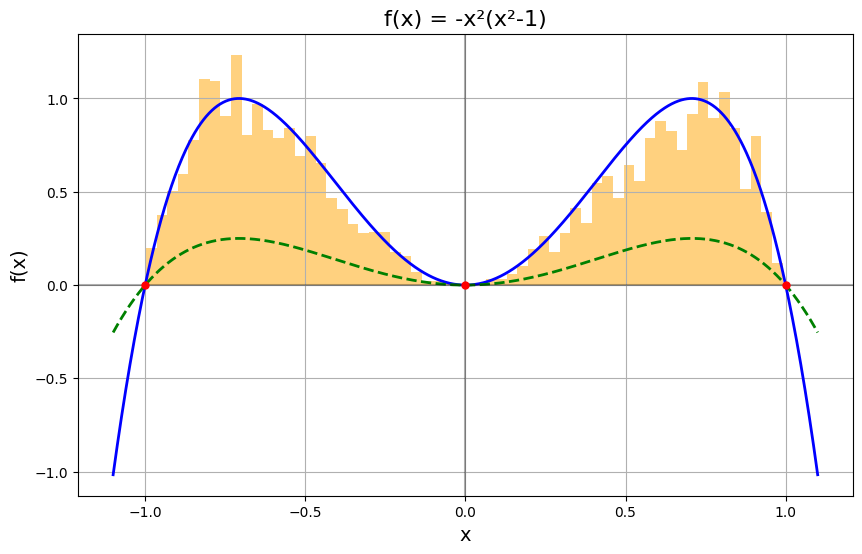

In [106]:
x = np.linspace(-1.1, 1.1, 1000)
y_unnormalized = target_function(x)

y = y_unnormalized / np.max(y_unnormalized)  # Normalize the target function for plotting


plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2, label='Normalized PDF')
plt.plot(x, y_unnormalized, 'g--', lw=2, label='Unnormalized PDF')
plt.hist(samples_asymmetric, bins=60, density=True, alpha=0.5, color='orange', label='Samples')
plt.grid(True)
plt.title('f(x) = -x²(x²-1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the roots and critical points
roots = [0, -1, 1]
for root in roots:
    plt.plot(root, 0, 'ro', ms=5)

plt.show()

Srep width simillar in proposal distribution

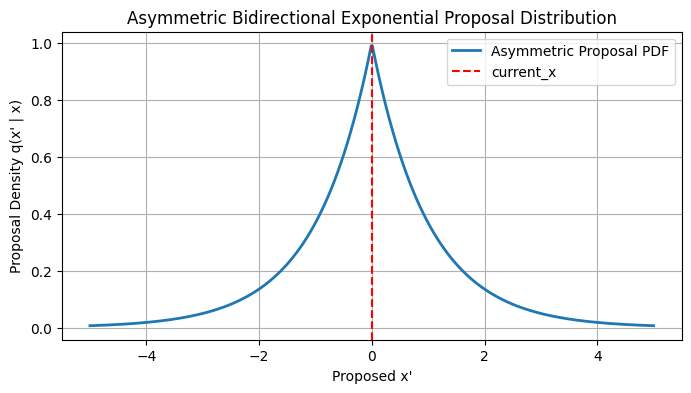

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
current_x = 0
proposal_width = 1.0

# Define the asymmetric proposal PDF
def proposal_density(x_prime, current_x, proposal_width):
    delta = x_prime - current_x
    if delta > 0:
        # Moving right: positive exponential
        return (1 / proposal_width) * np.exp(-delta / proposal_width)
    elif delta < 0:
        # Moving left: negative exponential (mirrored)
        return (1 / proposal_width) * np.exp(delta / proposal_width)
    else:
        return 0  # technically undefined at a point, or can return large value

# Vectorize for plotting
x_vals = np.linspace(-5, 5, 500)
proposal_pdf = [proposal_density(x, current_x, proposal_width) for x in x_vals]

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x_vals, proposal_pdf, label='Asymmetric Proposal PDF', lw=2)
plt.axvline(current_x, color='red', linestyle='--', label='current_x')
plt.title('Asymmetric Bidirectional Exponential Proposal Distribution')
plt.xlabel("Proposed x'")
plt.ylabel("Proposal Density q(x' | x)")
plt.legend()
plt.grid(True)
plt.show()


Step with different in proposal distribution

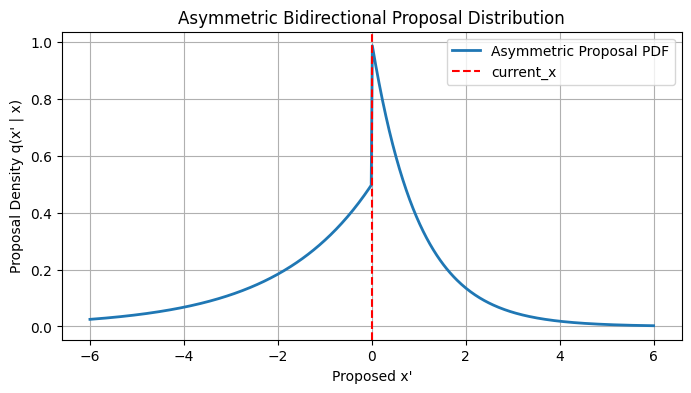

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Current position
current_x = 0

# Step widths (asymmetric)
step_width_right = 1.0  # smaller step = sharper decay
step_width_left = 2.0   # larger step = slower decay

# Define asymmetric proposal PDF
def proposal_density(x_prime, current_x, step_width_right, step_width_left):
    delta = x_prime - current_x
    if delta > 0:
        return (1 / step_width_right) * np.exp(-delta / step_width_right)
    elif delta < 0:
        return (1 / step_width_left) * np.exp(delta / step_width_left)
    else:
        return 0

# Plotting range
x_vals = np.linspace(-6, 6, 500)
proposal_pdf = [proposal_density(x, current_x, step_width_right, step_width_left) for x in x_vals]

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x_vals, proposal_pdf, label='Asymmetric Proposal PDF', lw=2)
plt.axvline(current_x, color='red', linestyle='--', label='current_x')
plt.title('Asymmetric Bidirectional Proposal Distribution')
plt.xlabel("Proposed x'")
plt.ylabel("Proposal Density q(x' | x)")
plt.legend()
plt.grid(True)
plt.show()
